### 딥러닝시 런타임 유형 변경
- 런타임 -> 런타임 유형 변경 -> 하드웨어 가속기 -> GPU 선택

- Colab의 장점
  - Deeplearning을 수행하기 위한 환경세팅이 되어져 있어 번거로운 부분이 생략 가능하다 (ex, Cuda Setting)
  - 많이 사용하는 패키지들이 설치되어져 있고, 리눅스 기반의 노트북이므로 리눅스 명령어를 사용할 수 있다.
  - TPU, GPU등 비싼 장비들을 무료로 사용할 수 있다는 장점이 있다. 운이 좋으면 코랩 무료 버전에서도 GPU p100(vram 20GB)을 사용 가능
<br>
- Colab의 단점
  - 속도가 느리다(전 세계에서 사용하므로 어쩔 수 없는 부분 .. ㅠ)
  - 많이 사용되는 패키지 library, framework들이 있지만, 없는 것도 많음 따라서 설치를 해주어야 하는데, 설치 후 런타임이 초기화 되면 다시 설치를 해주어야한다.
  - 데이터도 Colab에서 다운받으면 런타임이 초기화 되면, 사라진다. 따라서 데이터를 구글드라이브 마운트롤 통해서 구글 드라이브에 저장해야한다.
  - 런타임 유지 시간이 무료 버전의 경우 12시간
  - 유료 버전은 24시간 유료 버전을 쓰더라고 일정 시간 입력이 없을 경우 런타임 이 끊김
<br>
- 다른 버전의 코랩
  - 현재 국내에서는 정식 출시 되지 않음
  - 더 긴 런타임을 사용하기 위해서는 과금이 필요
  - colab pro(유료) - 1달에 1 ~ 1만 4천원 정도, colab pro+(유료) 1달에 - 5만원 이상

- Colab 사용시 주의사항 런타임 초기화와 런타임 끊기는 것에 대해서 조심하자

### GPU 확인하기

In [ ]:
!nvidia-smi

Mon Sep  6 01:58:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 소스코드 **다운로드**

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks
!git clone https://github.com/Kang812/DataAnalysis1.git

/content/drive/MyDrive/Colab_Notebooks
Cloning into 'DataAnalysis1'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 13 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.
ls: cannot access '-': No such file or directory
ls: cannot access 'ail': No such file or directory
/content/drive/MyDrive/Colab_Notebooks/DataAnalysis1:
Chest_X_Ray_C.h5			 README.txt   train_df.csv
Chest_X_Ray_Images_Classification.ipynb  test_df.csv  val_df.csv


### 소스코드 **다운로드 확인**

In [ ]:
!ls -ail /content/drive/MyDrive/Colab_Notebooks/DataAnalysis1

total 5644
3720 -rw------- 1 root root 4091312 Sep  6 00:38 Chest_X_Ray_C.h5
3724 -rw------- 1 root root 1027517 Sep  6 00:38 Chest_X_Ray_Images_Classification.ipynb
3542 drwx------ 8 root root    4096 Sep  6 00:38 .git
3728 -rw------- 1 root root      36 Sep  6 00:38 README.txt
3732 -rw------- 1 root root   68256 Sep  6 00:38 test_df.csv
3736 -rw------- 1 root root  585205 Sep  6 00:38 train_df.csv
3740 -rw------- 1 root root    1779 Sep  6 00:38 val_df.csv


### 데이터 다운로드 주소: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
- 데이터 다운로드 후 구글 드라이브에 업로드 파일의 크기가 커서 zip 형태로 업로드 후 압축해제

In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/archive.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/tra

### 데이터 다운로드 후 해당 경로에 있는 파일 확인
- 구글 드라이브에는 동기화 때문에 나중에 확인 가능

In [ ]:
!ls /content/drive/MyDrive/Colab_Notebooks/chest_xray/train/NORMAL

IM-0115-0001.jpeg		NORMAL2-IM-0478-0001.jpeg
IM-0117-0001.jpeg		NORMAL2-IM-0479-0001.jpeg
IM-0119-0001.jpeg		NORMAL2-IM-0480-0001.jpeg
IM-0122-0001.jpeg		NORMAL2-IM-0481-0001.jpeg
IM-0125-0001.jpeg		NORMAL2-IM-0482-0001.jpeg
IM-0127-0001.jpeg		NORMAL2-IM-0485-0001.jpeg
IM-0128-0001.jpeg		NORMAL2-IM-0486-0001.jpeg
IM-0129-0001.jpeg		NORMAL2-IM-0487-0001.jpeg
IM-0131-0001.jpeg		NORMAL2-IM-0488-0001.jpeg
IM-0133-0001.jpeg		NORMAL2-IM-0489-0001.jpeg
IM-0135-0001.jpeg		NORMAL2-IM-0490-0001.jpeg
IM-0137-0001.jpeg		NORMAL2-IM-0491-0001.jpeg
IM-0140-0001.jpeg		NORMAL2-IM-0493-0001.jpeg
IM-0141-0001.jpeg		NORMAL2-IM-0496-0001.jpeg
IM-0143-0001.jpeg		NORMAL2-IM-0497-0001.jpeg
IM-0145-0001.jpeg		NORMAL2-IM-0499-0001.jpeg
IM-0147-0001.jpeg		NORMAL2-IM-0500-0001.jpeg
IM-0149-0001.jpeg		NORMAL2-IM-0501-0001.jpeg
IM-0151-0001.jpeg		NORMAL2-IM-0502-0001.jpeg
IM-0152-0001.jpeg		NORMAL2-IM-0503-0001.jpeg
IM-0154-0001.jpeg		NORMAL2-IM-0506-0001.jpeg
IM-0156-0001.jpeg		NORMAL2-IM-0507-0001.jpeg
IM-0158-00

### 데이터 프레임 만들기
만드는 이유:
- 데이터를 잘 관리하기 위해서 .. ? 
- 이미지 데이터의 경로를 저장해서 해당 경로에 있는 데이터들을 for문을 이용해서 가져올 수 있기 때문에도 있다.

In [ ]:
#경로를 가져올 library load
from glob import glob

In [ ]:
train_path = glob("/content/drive/MyDrive/Colab_Notebooks/chest_xray/train/*/*.jpeg")
train_path[len(train_path) - 10:]

['/content/drive/MyDrive/Colab_Notebooks/chest_xray/train/PNEUMONIA/person1405_bacteria_3564.jpeg',
 '/content/drive/MyDrive/Colab_Notebooks/chest_xray/train/PNEUMONIA/person1399_bacteria_3549.jpeg',
 '/content/drive/MyDrive/Colab_Notebooks/chest_xray/train/PNEUMONIA/person1381_virus_2375.jpeg',
 '/content/drive/MyDrive/Colab_Notebooks/chest_xray/train/PNEUMONIA/person1423_bacteria_3650.jpeg',
 '/content/drive/MyDrive/Colab_Notebooks/chest_xray/train/PNEUMONIA/person1389_virus_2387.jpeg',
 '/content/drive/MyDrive/Colab_Notebooks/chest_xray/train/PNEUMONIA/person1438_bacteria_3718.jpeg',
 '/content/drive/MyDrive/Colab_Notebooks/chest_xray/train/PNEUMONIA/person1413_bacteria_3617.jpeg',
 '/content/drive/MyDrive/Colab_Notebooks/chest_xray/train/PNEUMONIA/person1374_bacteria_3506.jpeg',
 '/content/drive/MyDrive/Colab_Notebooks/chest_xray/train/PNEUMONIA/person1418_bacteria_3637.jpeg',
 '/content/drive/MyDrive/Colab_Notebooks/chest_xray/train/PNEUMONIA/person1431_bacteria_3698.jpeg']

### 라벨데이터 가져오기
- binary Classification의 주제
  - NORMAL과 PNEUMONIA를 분류

In [ ]:
import pandas as pd

label = []
for p in train_path:
    label.append(p.split("/")[len(p.split("/"))-2])

train_data= pd.DataFrame({"label":label,
                          "path":train_path})
train_data.head()

,label,path
0,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
1,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
2,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
3,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
4,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...


### test data set도 동일하게 진행

In [ ]:
test_path = glob("/content/drive/MyDrive/Colab_Notebooks/chest_xray/test/*/*.jpeg")


test_label = []
for p in test_path:
    test_label.append(p.split("/")[len(p.split("/"))-2])

test_data= pd.DataFrame({"label":test_label,
                          "path":test_path})

In [ ]:
test_data.head()

,label,path
0,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
1,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
2,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
3,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
4,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...


In [ ]:
val_path = glob("/content/drive/MyDrive/Colab_Notebooks/chest_xray/val/*/*.jpeg")


val_label = []
for p in val_path:
    val_label.append(p.split("/")[len(p.split("/"))-2])

val_data= pd.DataFrame({"label":val_label,
                          "path":val_path})

In [ ]:
val_data.head()

,label,path
0,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
1,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
2,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
3,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
4,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...


### Concat으로 train data set과 val data set을 하나로 Join을 하였다
  - 생각보다 너무 데이터 양이 적어서 train data에 merge함

In [ ]:
train_data = pd.concat([train_data, val_data], axis = 0)
train_data.head()

,label,path
0,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
1,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
2,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
3,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
4,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...


In [ ]:
train_data.to_csv("/content/drive/MyDrive/Colab_Notebooks/DataAnalysis1/train_df.csv" ,index = False)
test_data.to_csv("/content/drive/MyDrive/Colab_Notebooks/DataAnalysis1/test_df.csv" ,index = False)

In [ ]:
print("train_data shape:",train_data.shape)
print("test_data shape:",test_data.shape)

train_data shape: (5232, 2)
test_data shape: (624, 2)


### 데이터 Load 후 저장이 잘 되었는지 확인

In [ ]:
import pandas as pd

train_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/DataAnalysis1/train_df.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/DataAnalysis1/test_df.csv")

print("train_df shape:",train_df.shape)
print("test_df shape:",test_df.shape)

train_df shape: (5232, 2)
test_df shape: (624, 2)


### 이미지 데이터 불러오기
- 오래 걸림 .. ㅠ
- 상황에 따라서 금방 실행됨
- 가능하면 로컬 또는 개인 서버에서 실행하는 것이 좋음(Nividia 그래픽)

In [ ]:
import cv2

train_imgs = [cv2.resize(cv2.imread(x), (64,64)) for x in train_df['path'].tolist()]

KeyboardInterrupt: ignored

### label 데이터 encoding

In [ ]:
train_label_encoding = []
for i in train_df['label'].tolist():
    if i == 'NORMAL':
        train_label_encoding.append(0)
    else:
        train_label_encoding.append(1)

### 인코딩된 Label과 train data set의 모양 확인

In [ ]:
import numpy as np

print("Train Data set의 Shape:",np.asarray(train_imgs).shape)
print("Train Set label Count:", len(train_label_encoding))

Train Data set의 Shape: (5232, 64, 64, 3)
Train Set label Count: 5232


### Simple CNN Model 만들기

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

### 모델 성능 측정에 필요한 recall, precision, f1 score에 대한 함수 정의

In [ ]:

def recall(y_target, y_pred):
    y_target_yn = K.round(K.clip(y_target, 0, 1)) 
    y_pred_yn = K.round(K.clip(y_pred, 0, 1))

    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    count_true_positive_false_negative = K.sum(y_target_yn)

    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())
    return recall


def precision(y_target, y_pred):
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) 
    y_target_yn = K.round(K.clip(y_target, 0, 1)) 
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 
    count_true_positive_false_positive = K.sum(y_pred_yn)
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    return _f1score

### Simple CNN Model

In [ ]:
np.random.seed(3)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (64,64,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['acc', recall, precision, f1score])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1

### image 데이터의 값의 법위를 0 ~ 255에서 0 ~ 1 사이의 값으로 **변경**

In [ ]:
train = np.asarray(train_imgs)
train = train / 255.

In [ ]:
train.shape

(5232, 64, 64, 3)

In [ ]:
y_train = np.asarray(train_label_encoding)

### Data Training 

In [ ]:
history = model.fit(train, y_train, epochs=40, batch_size = 50, validation_split = 0.4)

NameError: ignored

### GPU 사용량 확인하기

### 모델 검증하기 위한 test set data 불러오기

In [ ]:
test_imgs = [cv2.resize(cv2.imread(x), (64,64)) for x in test_df['path'].tolist()]

test_label_encoding = []
for i in test_df['label'].tolist():
    if i == 'NORMAL':
        test_label_encoding.append(0)
    else:
        test_label_encoding.append(1)

test = np.asarray(test_imgs)
test = test/255.

y_test = np.asarray(test_label_encoding)

### 모델 검증

In [ ]:
A = model.evaluate(test, y_test)

20/20 [==============================] - 1s 62ms/step - loss: 1.7343 - acc: 0.7788 - recall: 0.6438 - precision: 0.6355 - f1score: 0.6383


### 예측

In [ ]:
A = model.predict(test)

### Threshold 값을 0.5해서 예측 확률이 0.5보다 크면 1, 작으면 0하고, 디코딩 실행

In [ ]:
len(A)
pred = []

for i in range(len(A)):
    score = A[i][0]
    if score > 0.5:
        pred.append(1)
    else:
        pred.append(0)
pred[:10]

[0, 1, 1, 1, 0, 1, 0, 0, 0, 0]

In [ ]:
decoding = []

for i in pred[:10]:
    if i == 0:
        decoding.append("NORMAL")
    else:
        decoding.append("PNEUMONIA")
decoding

['NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL']

### 예측 결과 확인

In [ ]:
test_df[:10]

,label,path
0,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
1,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
2,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
3,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
4,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
5,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
6,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
7,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
8,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...
9,NORMAL,/content/drive/MyDrive/Colab_Notebooks/chest_x...


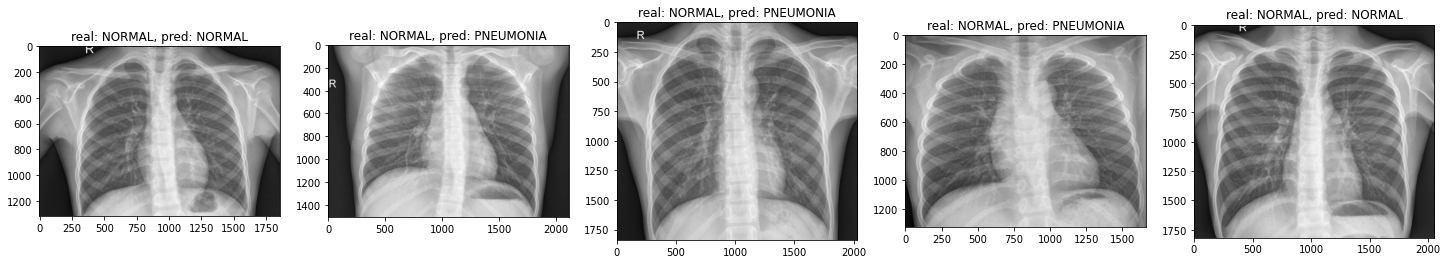

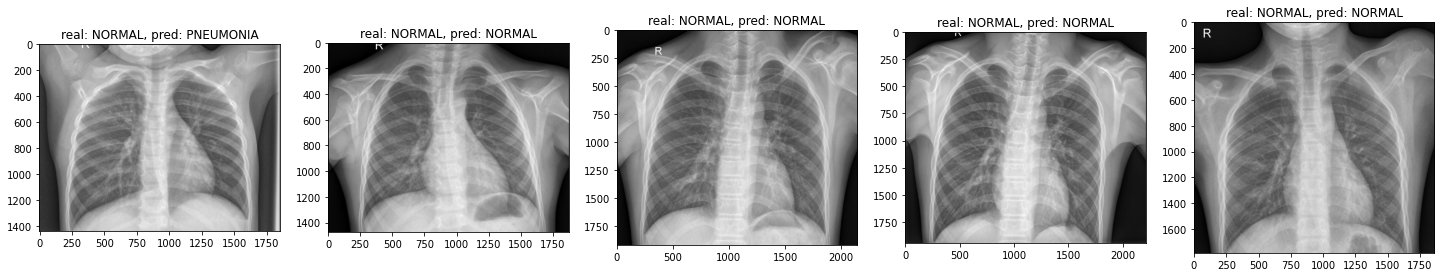

In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

img_p = test_df['path'].tolist()
fig, axs = plt.subplots(figsize = (25, 6), ncols = 5)
for i in range(5):
    img = cv2.imread(img_p[i], cv2.COLOR_BGR2RGB)
    axs[i].imshow(img, cmap = 'gray')
    axs[i].set_title("real: %s, pred: %s" % ("NORMAL",decoding[i]))

fig, axs = plt.subplots(figsize = (25, 6), ncols = 5)
for i in range(5):
    img = cv2.imread(img_p[i + 5], cv2.COLOR_BGR2RGB)
    axs[i].imshow(img, cmap = 'gray')
    axs[i].set_title("real: %s, pred: %s" % ("NORMAL",decoding[i + 5]))

### 각각의 acc, loss, recall, precision, f1socre에 대한 그래프 

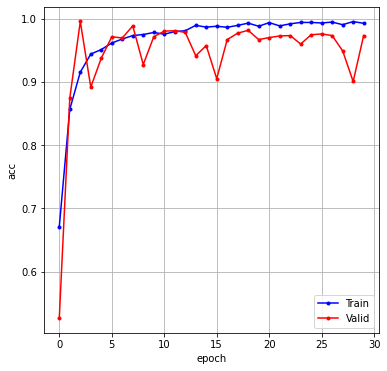

In [ ]:
y_acc = history.history['acc']
val_acc = history.history['val_acc']

x_len = np.arange(len(y_acc))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_acc, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_acc, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()

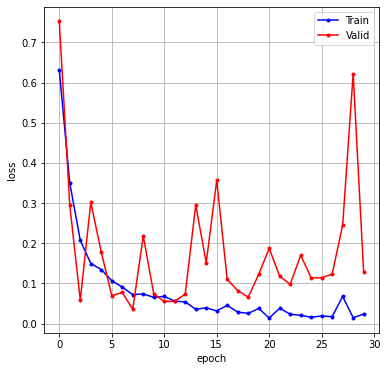

In [ ]:
y_loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(y_loss))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_loss, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_loss, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

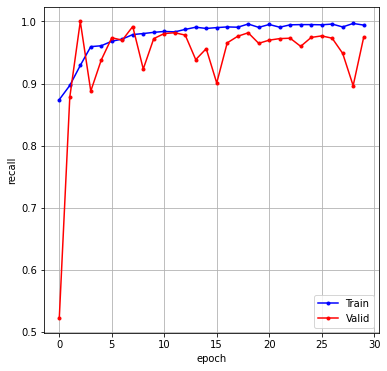

In [ ]:
y_recall = history.history['recall']
val_recall = history.history['val_recall']

x_len = np.arange(len(y_recall))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_recall, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_recall, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("recall")
plt.show()

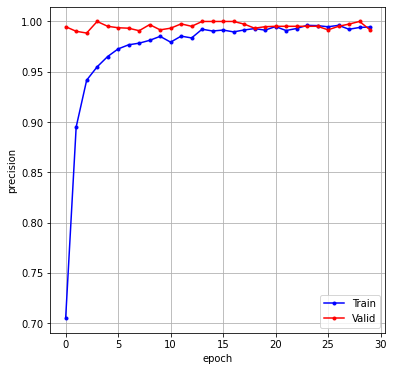

In [ ]:
y_precision = history.history['precision']
val_precision = history.history['val_precision']

x_len = np.arange(len(y_recall))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_precision, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_precision, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("precision")
plt.show()

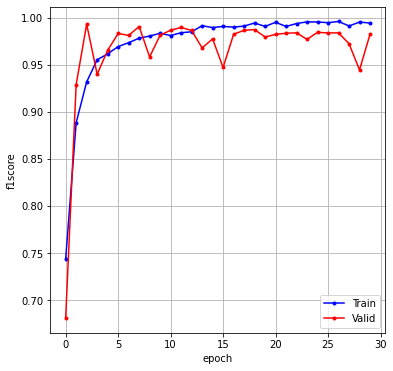

In [ ]:
y_f1score = history.history['f1score']
val_f1score = history.history['val_f1score']

x_len = np.arange(len(y_recall))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_f1score, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_f1score, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("f1score")
plt.show()

### 추후 보강할 점
- 더 성능 좋은 모델 사용(VGG16 추가, Retina net 등등 ) 후 성능 좋은 모델 Selection
- 데이터 EDA하기
- train set과 Validation Set의 비율을 조정을 통한 모델의 학습 능력 상향